In [9]:
# !pip install mininet
!pip install diagrams


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 33.2 MB/s eta 0:00:00


In [10]:
from diagrams import Diagram, Cluster

# Define nodes (switches and hosts)
switches = ['Switch{}'.format(i+1) for i in range(6)]
hosts = ['Host{}.{}'.format(i+1, j+1) for i in range(6) for j in range(3)]

# Create a diagram
with Diagram("SDN Network Topology", show=False) as diag:
    with Cluster("Switches"):
        switch_nodes = [diag.node(switch) for switch in switches]

    with Cluster("Hosts"):
        host_nodes = [diag.node(host) for host in hosts]

    # Connect hosts to their respective switches
    for i in range(6):
        for j in range(3):
            diag.edge(switch_nodes[i], host_nodes[i * 3 + j], label='')

# Render and display the diagram
diag.save("sdn_network_topology.png")


TypeError: Diagram.node() missing 1 required positional argument: 'label'

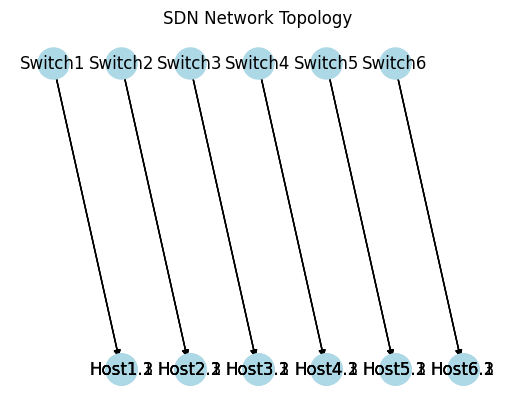

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define switches and hosts
switches = ['Switch{}'.format(i+1) for i in range(6)]
hosts = ['Host{}.{}'.format(i+1, j+1) for i in range(6) for j in range(3)]

# Add nodes (switches and hosts) to the graph
G.add_nodes_from(switches)
G.add_nodes_from(hosts)

# Add edges (connections from switches to hosts)
for i in range(6):
    for j in range(3):
        G.add_edge('Switch{}'.format(i+1), 'Host{}.{}'.format(i+1, j+1))

# Define positions for nodes
pos = {}
for i, switch in enumerate(switches):
    pos[switch] = (i * 2, 0)  # Spread switches horizontally

for i, host in enumerate(hosts):
    switch_number = int(host.split('.')[0][-1])
    pos[host] = (switch_number * 2, -1)  # Position hosts below respective switches

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True)

# Display the plot
plt.title('SDN Network Topology')
plt.axis('off')  # Turn off axis labels
plt.show()
